# 개념

In [1]:
from konlpy.tag import Okt

text = """
텍스트 마이닝은 데이터 속에서 가치 있는 정보를 추출하는 기술입니다.
의미망 분석과 네트워크 분석은 텍스트 마이닝의 중요한 분석 기법 중 하나입니다.
파이썬을 활용하면 이러한 분석을 효과적으로 수행할 수 있습니다.
데이터 시각화는 분석 결과를 이해하는 데 큰 도움을 줍니다.
"""

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 명사만 추출하여 리스트로 저장
nouns = []
for sentence in text.split('\n'):
    if sentence: # 빈 줄은 제외
        nouns.extend(okt.nouns(sentence))

# 단어 길이가 1개인 것은 제외
nouns = [noun for noun in nouns if len(noun) > 1]

print("추출된 명사:", nouns)

추출된 명사: ['텍스트', '이닝', '데이터', '가치', '정보', '추출', '기술', '의미', '분석', '네트워크', '분석', '텍스트', '이닝', '분석', '기법', '하나', '파이썬', '활용', '분석', '효과', '수행', '데이터', '시각', '분석', '결과', '이해', '도움']


In [2]:
from itertools import combinations
from collections import Counter

# 문장 단위로 명사 분리
sentences_nouns = []
for sentence in text.split('\n'):
    if sentence:
        sentences_nouns.append([noun for noun in okt.nouns(sentence) if len(noun) > 1])

# 한 문장 내에서 동시 출현하는 단어 쌍 추출
# window size=2 (인접한 두 단어)로 설정하여 조합 생성도 가능
word_pairs = []
for sentence in sentences_nouns:
    # 한 문장 내 모든 명사들의 모든 조합(2개씩)을 생성
    for pair in combinations(sentence, 2):
        word_pairs.append(tuple(sorted(pair))) # 순서에 상관없이 세기 위해 정렬

# 단어 쌍 빈도 계산
word_pair_counts = Counter(word_pairs)

print("단어 쌍 및 출현 빈도:")
print(word_pair_counts.most_common(5))

단어 쌍 및 출현 빈도:
[(('분석', '의미'), 3), (('네트워크', '분석'), 3), (('분석', '분석'), 3), (('분석', '텍스트'), 3), (('분석', '이닝'), 3)]


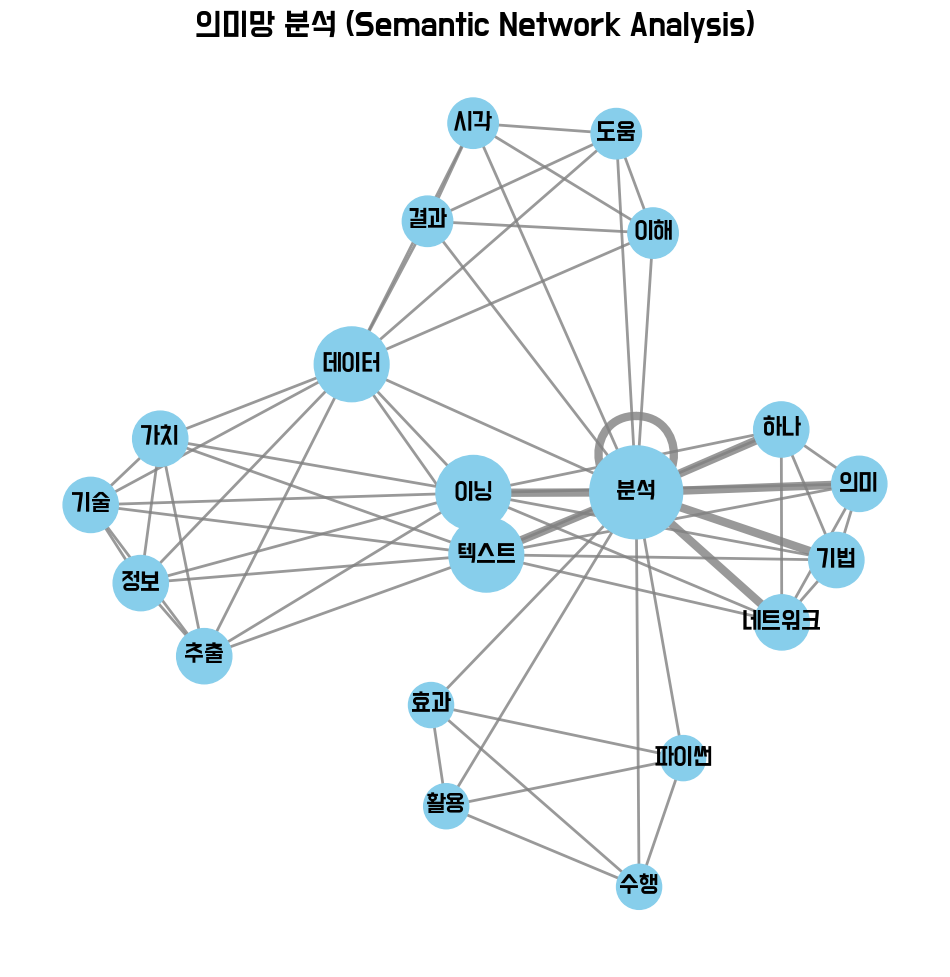

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows, Mac, Linux 환경에 맞게 경로 수정 필요)
# 예: Windows
font_path = 'BMDOHYEON_ttf.ttf'
# 예: Mac
# font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)


# 네트워크 그래프 객체 생성
G = nx.Graph()

# 특정 빈도수 이상의 단어 쌍만 네트워크에 추가 (너무 복잡해지는 것을 방지)
for pair, freq in word_pair_counts.items():
    if freq >= 1: # 여기서는 모든 쌍을 포함 (데이터가 적으므로)
        G.add_edge(pair[0], pair[1], weight=freq)

# 노드 크기 설정을 위한 중심성 계산 (연결성이 많은 단어가 더 크게 표시됨)
dgr = nx.degree_centrality(G)
node_size = [v * 5000 for v in dgr.values()]

# 엣지 굵기 설정 (빈도수가 높을수록 굵게 표시됨)
edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]

# 네트워크 시각화
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.8, iterations=50) # 노드 위치 계산

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color='black')

plt.title('의미망 분석 (Semantic Network Analysis)', size=20)
plt.axis('off') # 축 제거
plt.show()

# 연습문제
1. text 변수의 내용을 아래의 '날씨' 관련 텍스트로 변경한 후, 전체 코드를 실행하여 네트워크 그래프를 생성하고 기존 결과와 어떻게 다른지 간단히 비교해보세요.

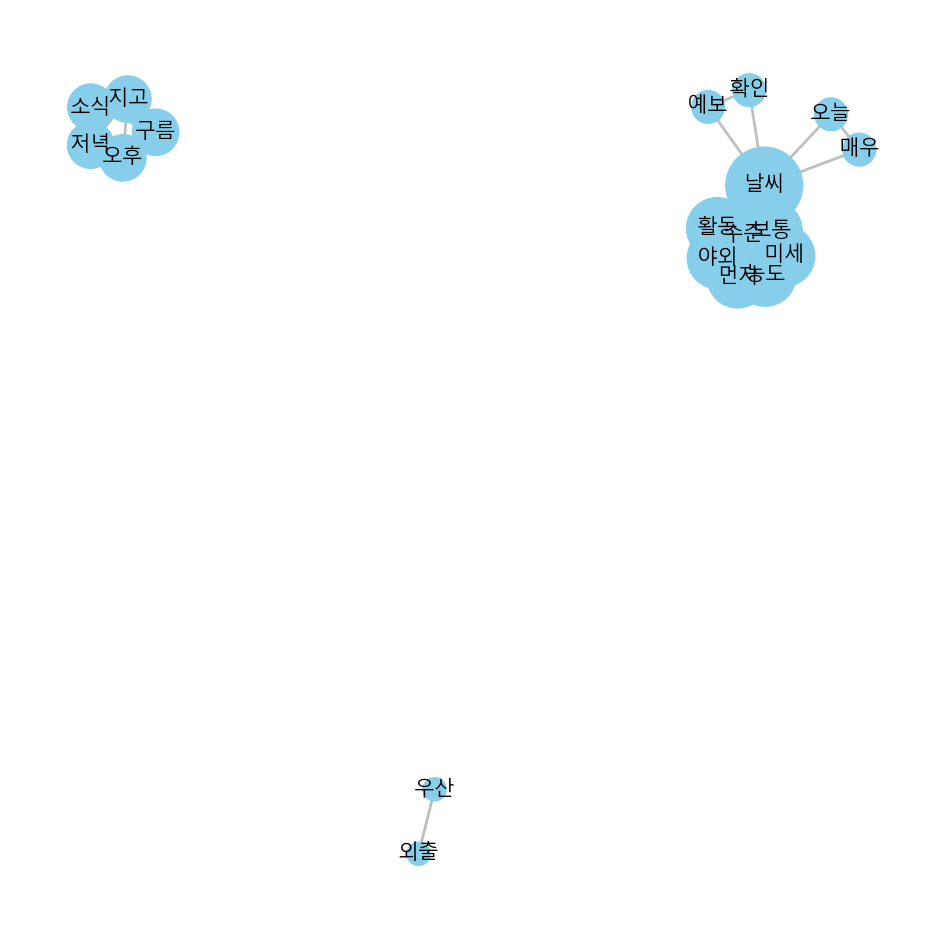

In [5]:
from konlpy.tag import Okt, Kkma
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

text_p1 = """
오늘 날씨는 매우 맑고 화창합니다.
미세먼지 농도도 보통 수준이라 야외 활동하기 좋은 날씨입니다.
하지만 오후부터는 구름이 많아지고 저녁에는 비 소식이 있습니다.
외출 시 작은 우산을 챙기는 것이 좋겠습니다. 날씨 예보를 꼭 확인하세요.
"""

kkma = Kkma()

nouns = okt.nouns(text_p1)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p1):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
for i in sentences_nouns:
    for pair in combinations(i, 2):
        word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]

# 선의 굵기 표현
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize = (12, 12))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

2. 현재 코드는 okt.nouns()를 사용해 명사만 추출하고 있습니다. okt.pos()를 사용하여 ```명사(Noun)```와 ```형용사(Adjective)```를 함께 추출하도록 코드를 수정하고, 그 결과로 생성된 네트워크가 명사만 사용했을 때와 어떻게 달라지는지 비교 분석해보세요.

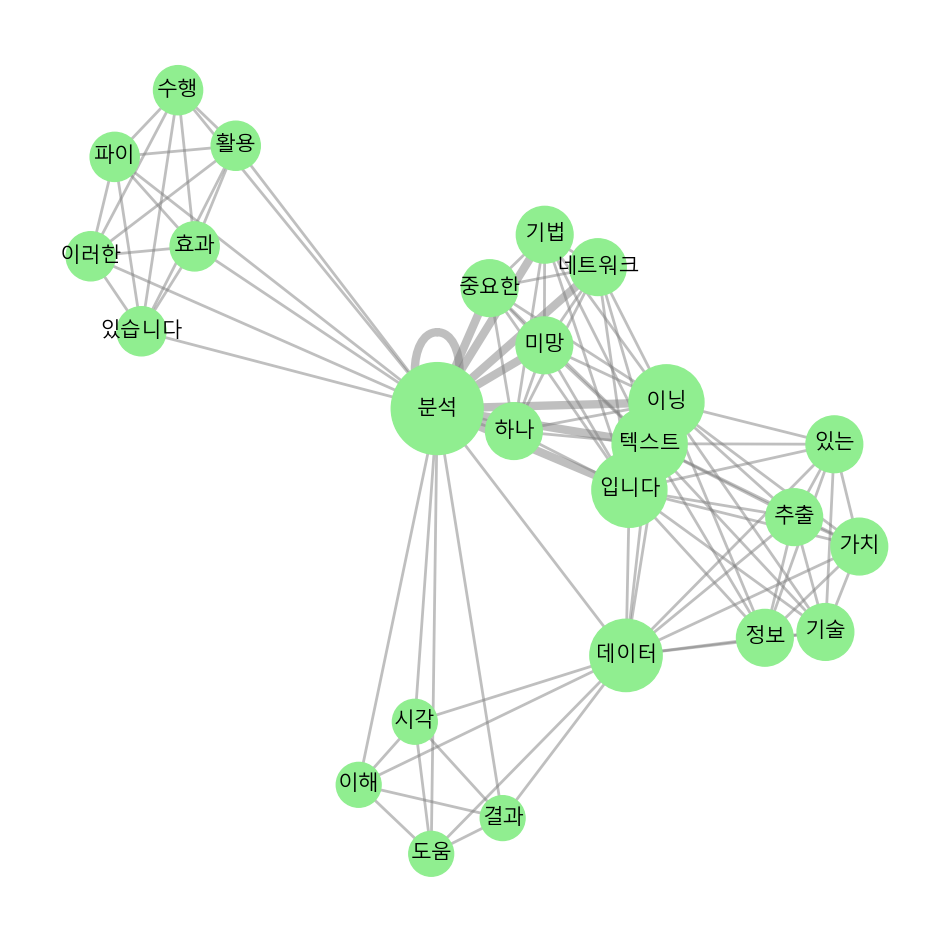

In [15]:
text_p2 = """
텍스트 마이닝은 데이터 속에서 가치 있는 정보를 추출하는 기술입니다.
의미망 분석과 네트워크 분석은 텍스트 마이닝의 중요한 분석 기법 중 하나입니다.
파이썬을 활용하면 이러한 분석을 효과적으로 수행할 수 있습니다.
데이터 시각화는 분석 결과를 이해하는 데 큰 도움을 줍니다.
"""

okt = Okt()
kkma = Kkma()

words_pos = okt.pos(text_p2)
filtered_words = [word for word, tag in words_pos if tag in ['Noun', 'Adjective'] and len(word) >= 2]

sentences_words = []
for sentence in kkma.sentences(text_p2):
    pos_tags = okt.pos(sentence)
    words = [word for word, tag in pos_tags if tag in ['Noun', 'Adjective'] and len(word) >= 2]
    sentences_words.append(words)

word_pairs = []
for sentence in sentences_words:
    for pair in combinations(sentence, 2):
        word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

G = nx.Graph()
for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight=freq)

centrality = nx.degree_centrality(G)
node_size = [c * 5000 for c in centrality.values()]
edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family=font_name)

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="lightgreen")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

3. 전체 텍스트에서 1번만 등장하는 단어는 우연히 나타났을 가능성이 높습니다. 전체 텍스트에서 각 명사의 출현 빈도를 계산한 후, 2번 이상 등장한 명사들만 사용하여 의미망 분석을 수행하도록 코드를 수정해보세요.

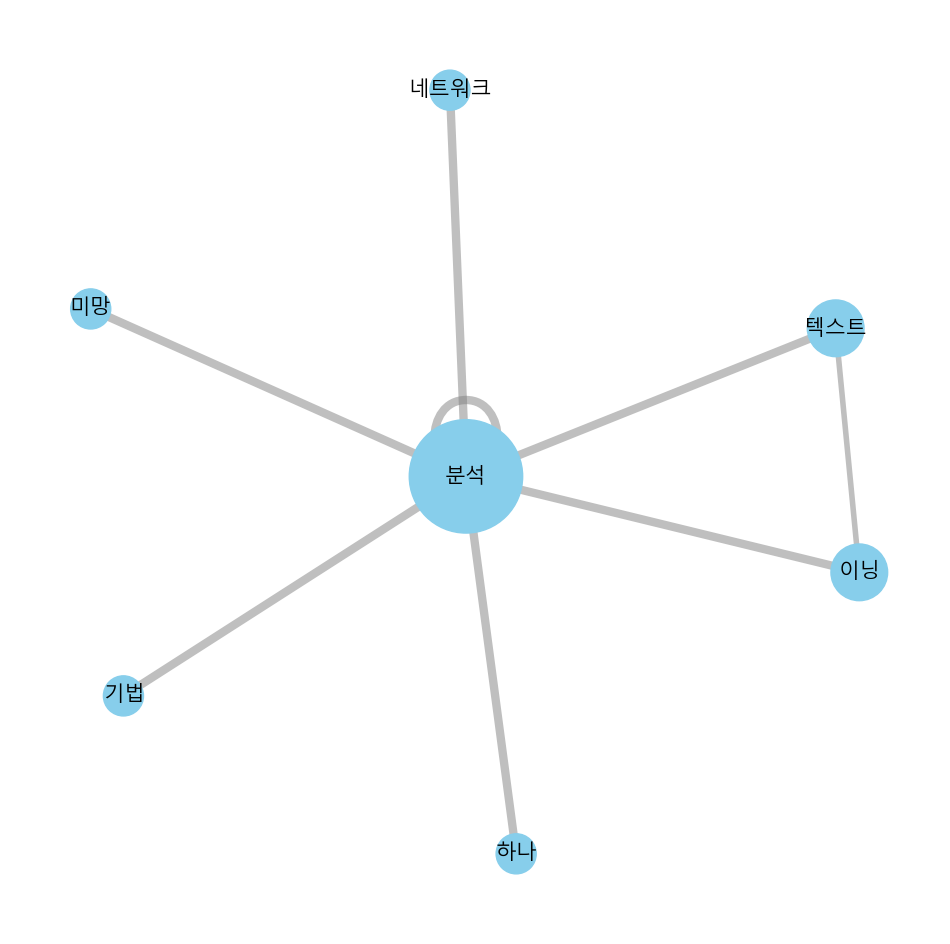

In [16]:
text_p3 = """
텍스트 마이닝은 데이터 속에서 가치 있는 정보를 추출하는 기술입니다.
의미망 분석과 네트워크 분석은 텍스트 마이닝의 중요한 분석 기법 중 하나입니다.
파이썬을 활용하면 이러한 분석을 효과적으로 수행할 수 있습니다.
데이터 시각화는 분석 결과를 이해하는 데 큰 도움을 줍니다. 분석은 중요합니다.
"""

okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text_p3)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p3):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
for i in sentences_nouns:
    for pair in combinations(i, 2):
        word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 2:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]

# 선의 굵기 표현
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize = (12, 12))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

4. 현재 코드는 한 '문장' 안에 등장하면 모두 동시 출현으로 간주합니다. 이 기준을 더 엄격하게 바꿔, 한 문장 내에서 서로 인접한 5개의 단어 내에 함께 등장할 경우에만 동시 출현으로 간주하도록 로직을 변경해보세요.

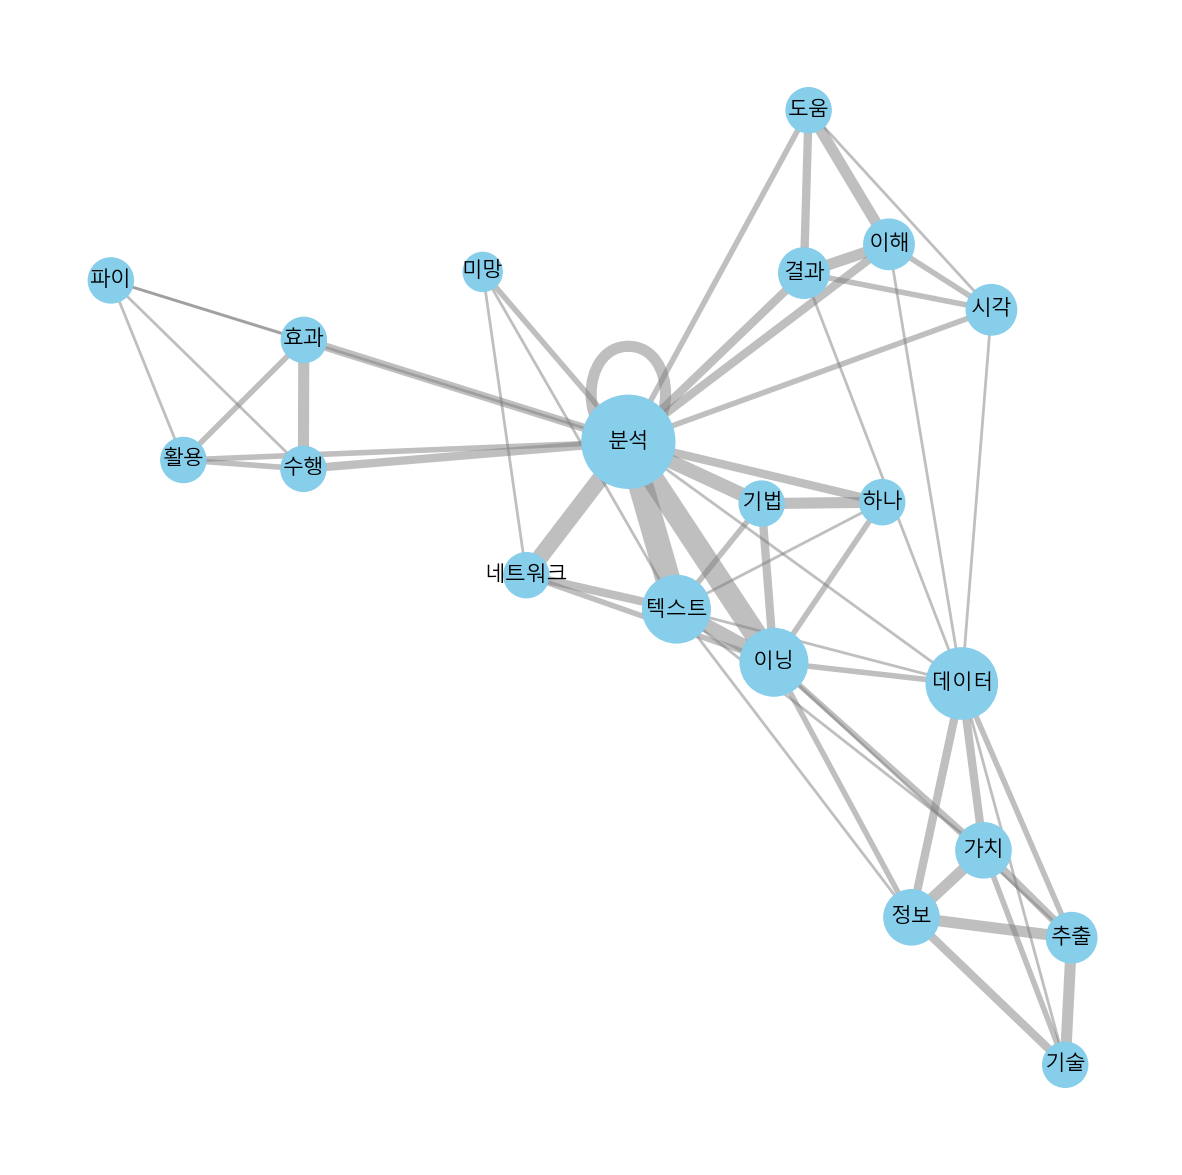

In [18]:
text_p4 = """
텍스트 마이닝은 데이터 속에서 가치 있는 정보를 추출하는 기술입니다.
의미망 분석과 네트워크 분석은 텍스트 마이닝의 중요한 분석 기법 중 하나입니다.
파이썬을 활용하면 이러한 분석을 효과적으로 수행할 수 있습니다.
데이터 시각화는 분석 결과를 이해하는 데 큰 도움을 줍니다.
"""

okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text_p4)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p4):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
window_size = 5
for tokens in sentences_nouns:
    for i in range(len(tokens)):
        window = tokens[i:i + window_size]
        for pair in combinations(window, 2):
            word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize = (15, 15))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

5. G.add_edge()로 네트워크를 생성하는 부분에서, 동시 출현 빈도(freq)가 2 이상인 단어 쌍(pair)만 엣지로 추가하도록 코드를 수정하세요. 이를 통해 약한 연결은 제거하고 핵심적인 관계만 명확하게 볼 수 있습니다.

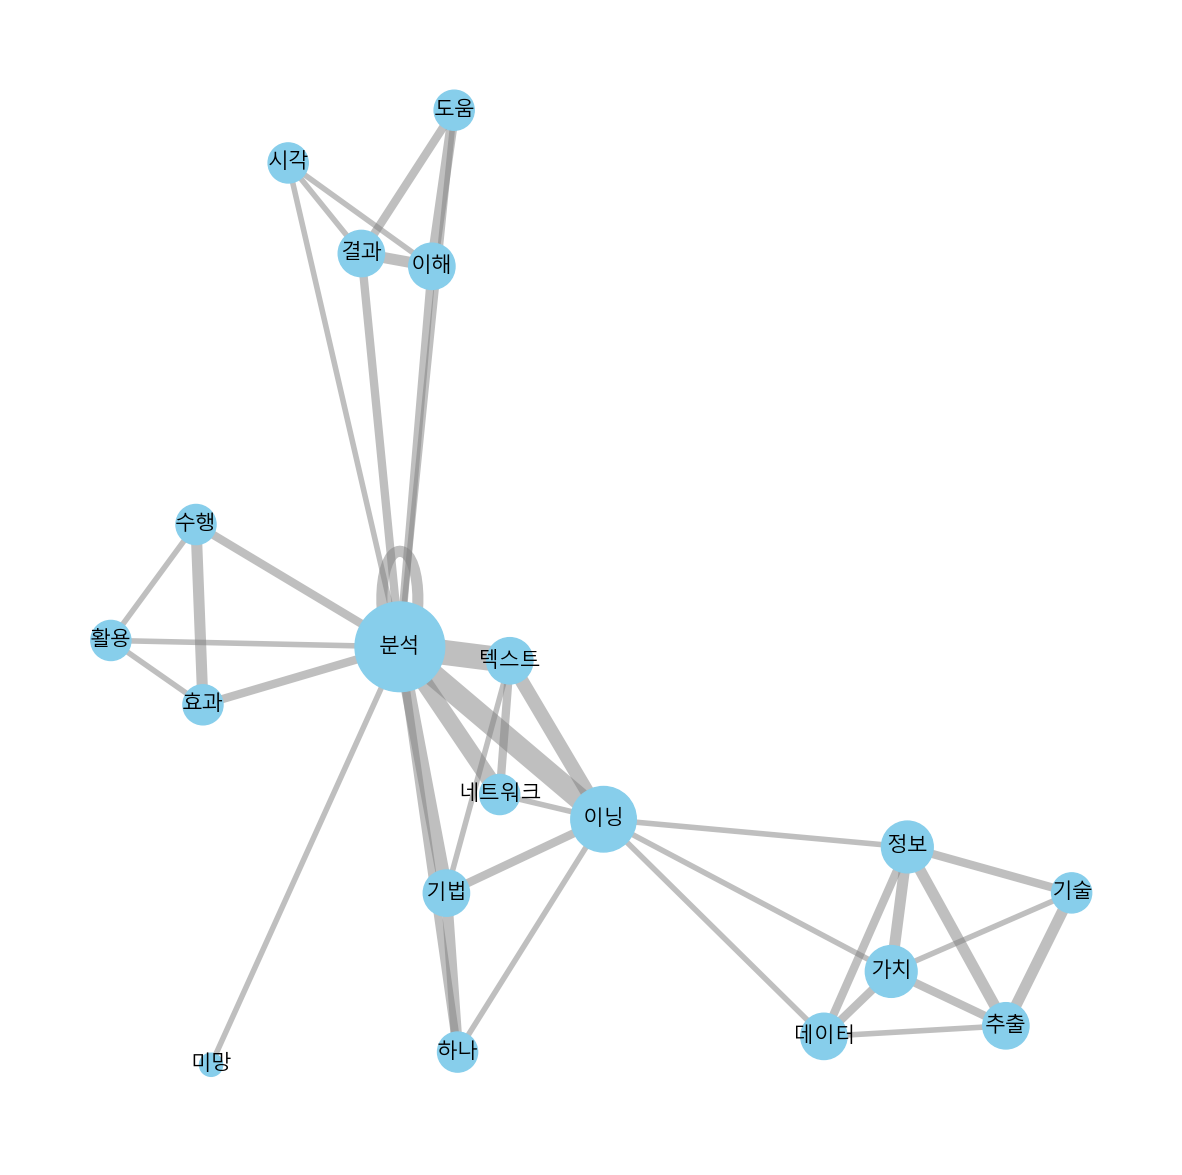

In [19]:
okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text_p4)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p4):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
window_size = 5
for tokens in sentences_nouns:
    for i in range(len(tokens)):
        window = tokens[i:i + window_size]
        for pair in combinations(window, 2):
            word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 2:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize = (15, 15))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

6. 현재 노드의 크기는 연결의 개수(degree_centrality)를 기준으로 하고 있습니다. 이것을 해당 단어의 전체 텍스트 내 총 출현 빈도를 기준으로 노드 크기를 설정하도록 코드를 변경하고, 시각화 결과가 어떻게 달라지는지 설명하세요.

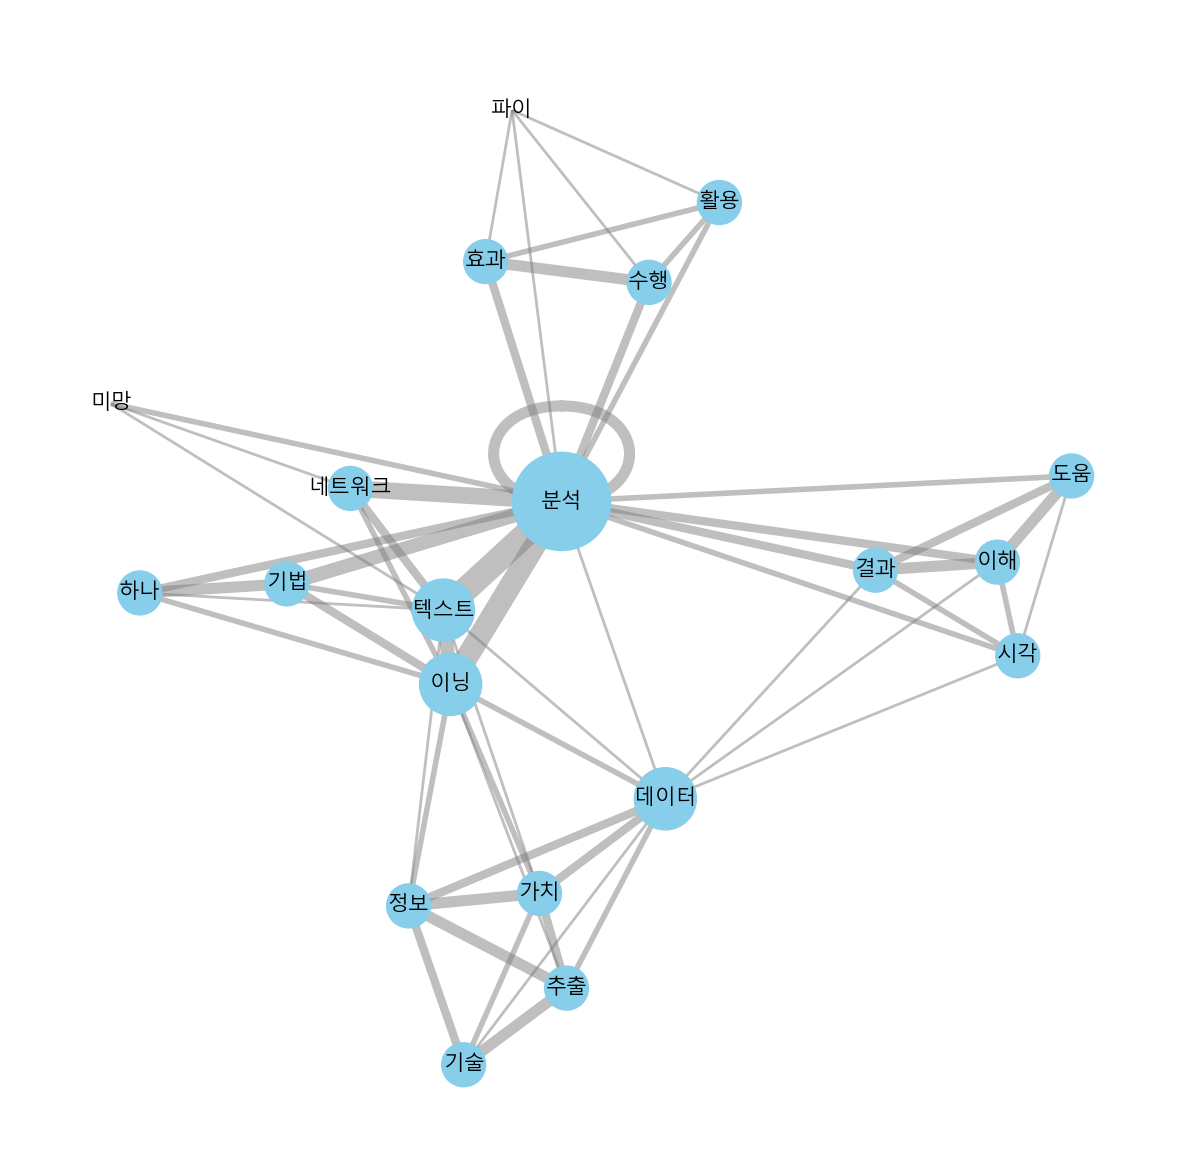

In [20]:
okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text_p4)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p4):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
window_size = 5
for tokens in sentences_nouns:
    for i in range(len(tokens)):
        window = tokens[i:i + window_size]
        for pair in combinations(window, 2):
            word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight = freq)

noun_freq = Counter(nouns)
node_size = [noun_freq[node] * 1000 for node in G.nodes()]

edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize = (15, 15))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

6번 - 설명.   

[1번: degree centrality 기반]   
- ‘분석’ 노드가 가장 크며, 연결이 많은 중심 노드로 시각화됨  

- 연결의 허브 역할을 하는 단어들이 크고 눈에 띔 (예: 텍스트, 마이닝 등)

- ‘중요 단어’ ≒ 다른 단어와 자주 연결된 단어를 의미

- 연결 구조가 복잡한 쪽(예: 중심에서 엣지가 많이 퍼지는 부분)이 크게 부각됨    

[2번: 출현 빈도 기반]     
- 여전히 ‘분석’이 가장 큰 노드지만, 그 외에 텍스트, 이닝, 데이터 등의 크기가 다소 조정됨

- 같은 연결 수라도 텍스트에 자주 등장한 단어는 더 크게 표시됨

- 주변에 위치한 단어들의 크기 차이가 더 명확하게 드러남

- 연결은 많지 않아도 자주 쓰인 단어는 부각됨 (→ ‘기술’, ‘추출’ 등)

7. networkx의 시각화 옵션을 변경하여 개성있는 그래프를 만들어보세요.
    * 노드 색상(node_color)을 'skyblue'에서 'lightcoral'로 변경하세요.
    * 노드 위치 계산 레이아웃(nx.spring_layout)을 nx.circular_layout이나 nx.kamada_kawai_layout으로 변경해보세요.
    * 변경된 레이아웃이 기존 spring_layout과 비교하여 관계를 파악하는 데 어떤 장단점이 있는지 설명하세요.

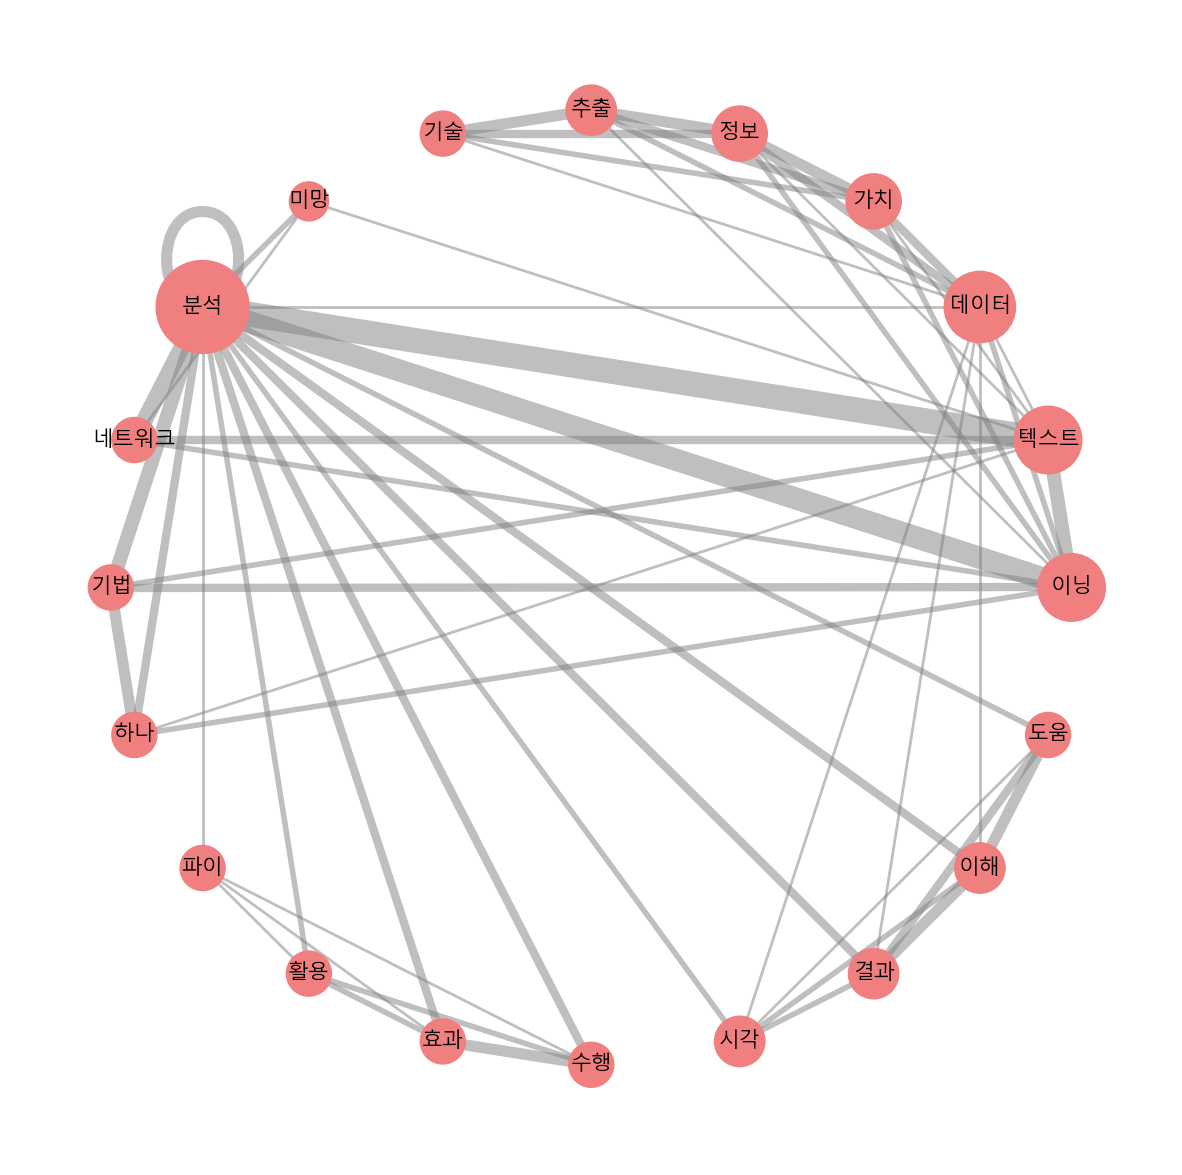

In [24]:
okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text_p4)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p4):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
window_size = 5
for tokens in sentences_nouns:
    for i in range(len(tokens)):
        window = tokens[i:i + window_size]
        for pair in combinations(window, 2):
            word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G) 

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="lightcoral")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

7번 - 설명.   

circular_layout : 노드를 원형에 균등하게 배치하는 방식

🔹 장점
- 배치 일관성 : 노드가 항상 같은 원형 배치를 유지하므로, 결과가 재현 가능하고 비교 분석에 유리함

- 정돈된 구조 : 시각적으로 깔끔하고 균형감 있는 레이아웃을 제공함

- 작은 규모 의미망에 적합 : 노드 수가 적고 관계가 복잡하지 않을 때 관계를 빠르게 파악하기 쉬움

🔹 단점
- 중심성과 관계 밀도 표현이 어려움 : 모든 노드가 동일 거리로 배치되므로, 누가 중요한 단어인지 한눈에 파악하기 어려움

- 관계 강도나 영향력 중심이 드러나지 않음 : 실제로 연결이 많은 단어도 그냥 원의 한 점으로 표현되므로, 네트워크의 구조적 특징이 약화됨

8. degree_centrality(연결 중심성) 외에 betweenness_centrality(매개 중심성)를 계산하여 가장 높은 값 3개를 가진 단어들을 출력하세요. 그리고 '매개 중심성'이 이 네트워크에서 어떤 의미를 가지는지, 왜 그 단어들이 높게 나왔을지 해석해보세요.

In [25]:
okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text_p4)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text_p4):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
window_size = 5
for tokens in sentences_nouns:
    for i in range(len(tokens)):
        window = tokens[i:i + window_size]
        for pair in combinations(window, 2):
            word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

# 매개 중심성 계산
betweenness = nx.betweenness_centrality(G)

top3 = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
for word, score in top3:
    print(f"{word}: {score:.4f}")

분석: 0.5106
데이터: 0.1854
이닝: 0.0948


8번 - 설명.   

매개 중심성은 하나의 노드가 다른 노드 쌍 간의 최단 경로 상에 얼마나 자주 등장하는지를 측정하는 지표로서, 네트워크 안에서 정보의 흐름이나 관계 연결의 ‘중간 다리’ 역할을 얼마나 하는가를 나타냄

- '분석'
    - 네트워크 전반의 핵심 개념이며, '텍스트', '이닝', '데이터', '기법', '시각화' 등 다양한 주제어와 모두 연결되어 있음
    - 다양한 단어 군집 사이를 연결하는 중간 허브 역할을 하므로, 많은 최단 경로의 중간에 위치함
- '텍스트'
    - '마이닝', '데이터', '분석', '기법' 등 기술/개념 단어들과 고르게 연결되어 있어 구조적으로 중요한 통로 역할을 함
- '이닝'
    - '텍스트 마이닝'이라는 복합 키워드로부터 다양한 분석 개념들과 연결되며, 네트워크의 지식 흐름의 갈림길 역할을 수행함



9. 관심 있는 주제의 인터넷 뉴스 기사 1개를 선택하여 본문 전체를 복사한 후, 이를 text 변수에 넣어 의미망 분석을 수행하세요. 최종적으로 생성된 네트워크 그래프를 보고, 해당 기사의 핵심 키워드와 주제가 무엇인지 1~2문단으로 요약하여 설명하세요.

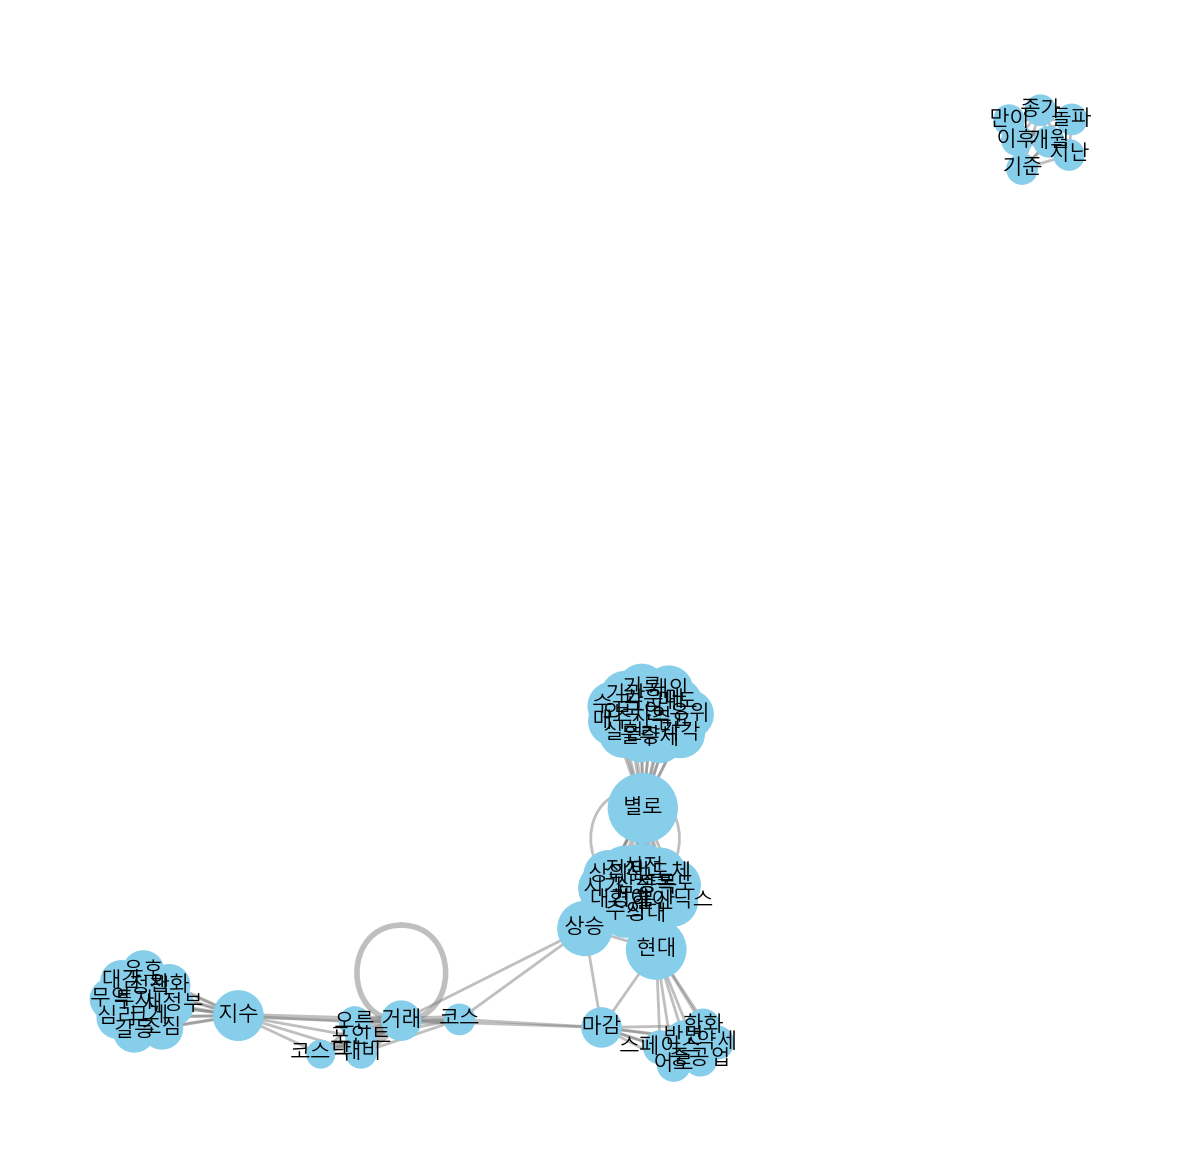

In [27]:
from konlpy.tag import Okt, Kkma
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

text = """
코스피가 1%대 상승 마감하며 6거래일째 오름세를 이어갔다.
새정부 정책기대감에 더해 미중 무역갈등 완화 조짐 등이 맞물리면서 우호적인 투자심리가 지수를 크게 멀어 올렸다.
11일 코스피지수는 전거래일대비 35.19포인트(1.23%) 오른 2,907.04로 거래를 마쳤다.
종가 기준 2,900선 돌파는 지난 2022년 1월14일(2,921.92) 이후 3년5개월여만이다.
주요 수급주체별로는 외국인과 기관이 각각 1,600억원, 2,200억원 매수 우위를 기록한 가운데, 개인은 차익실현성 물량을 내놓으며 3,600억원 순매도세를 보였다.
시가총액 상위종목별로는 삼성전자(1.18%), SK하이닉스(4.12%) 등 대형반도체주의 선전이 돋보였으며, 두산에너빌리티(6.46%), 삼성물산(4.15%), 현대차(2.03%), 기아(2.54%) 등의 상승폭도 상대적으로 컸다.
반면, 한화에어로스페이스(-3.31%), HD현대중공업(-2.11%) 등은 약세 마감했다.
코스닥지수는 전거래일대비 15.09포인트(1.96%) 오른 786.29로 거래를 마쳤다.
"""

okt = Okt()
kkma = Kkma()

nouns = okt.nouns(text)
nouns = [i for i in nouns if len(i) >= 2]

sentences_nouns = [] 
for i in kkma.sentences(text):
    A = [j for j in okt.nouns(i) if len(j) >= 2]
    sentences_nouns.append(A)

word_pairs = []
for i in sentences_nouns:
    for pair in combinations(i, 2):
        word_pairs.append(tuple(sorted(pair)))

word_pairs_count = Counter(word_pairs)

my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family = font_name)

G = nx.Graph()

for pair, freq in word_pairs_count.items():
    if freq >= 1:
        G.add_edge(pair[0], pair[1], weight = freq)

A = nx.degree_centrality(G) 
node_size = [i * 5000 for i in A.values()]

# 선의 굵기 표현
edge_weights = [G[u][v]["weight"] * 2 for u,v in G.edges()]

plt.figure(figsize = (15, 15))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15, font_color="black")

plt.axis("off")
plt.show()

9번 - 설명.   

- 핵심 키워드   
: 코스피, 상승, 지수, 거래, 마감, 외국인, 기관, 삼성전자, 현대차, 반도체

- 요약   
: 코스피 지수가 1.23% 상승하며 2,900선을 돌파했고, 이는 3년 5개월 만의 최고치입니다. 외국인·기관의 매수세, 삼성전자·SK하이닉스 등 반도체주 강세, 그리고 현대차·기아 등 대형주 상승이 주요 원인으로 작용했습니다.

10. 아래의 '인공지능'에 대한 두 가지 다른 관점의 텍스트를 각각 의미망 분석하여 2개의 네트워크 그래프를 만드세요. 두 네트워크의 중심 단어와 주요 연결 관계를 비교하고, 각 텍스트가 인공지능을 어떤 관점에서 바라보는지 분석하여 설명하세요.

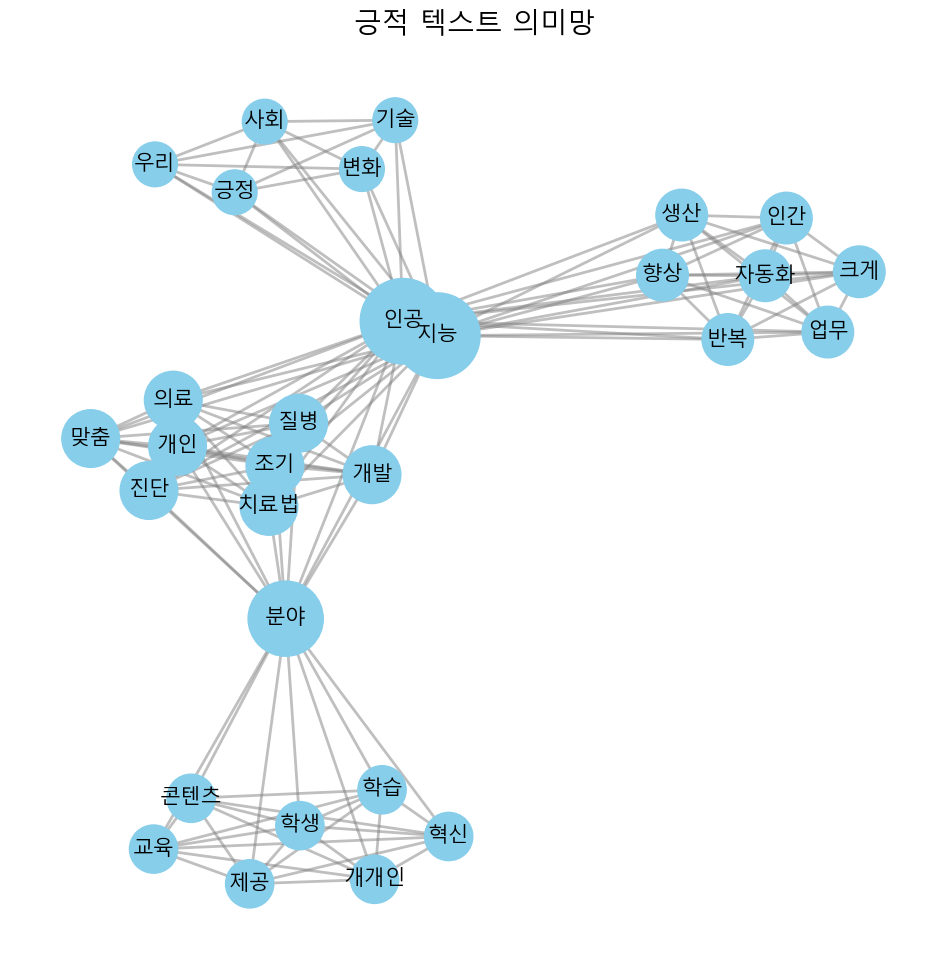

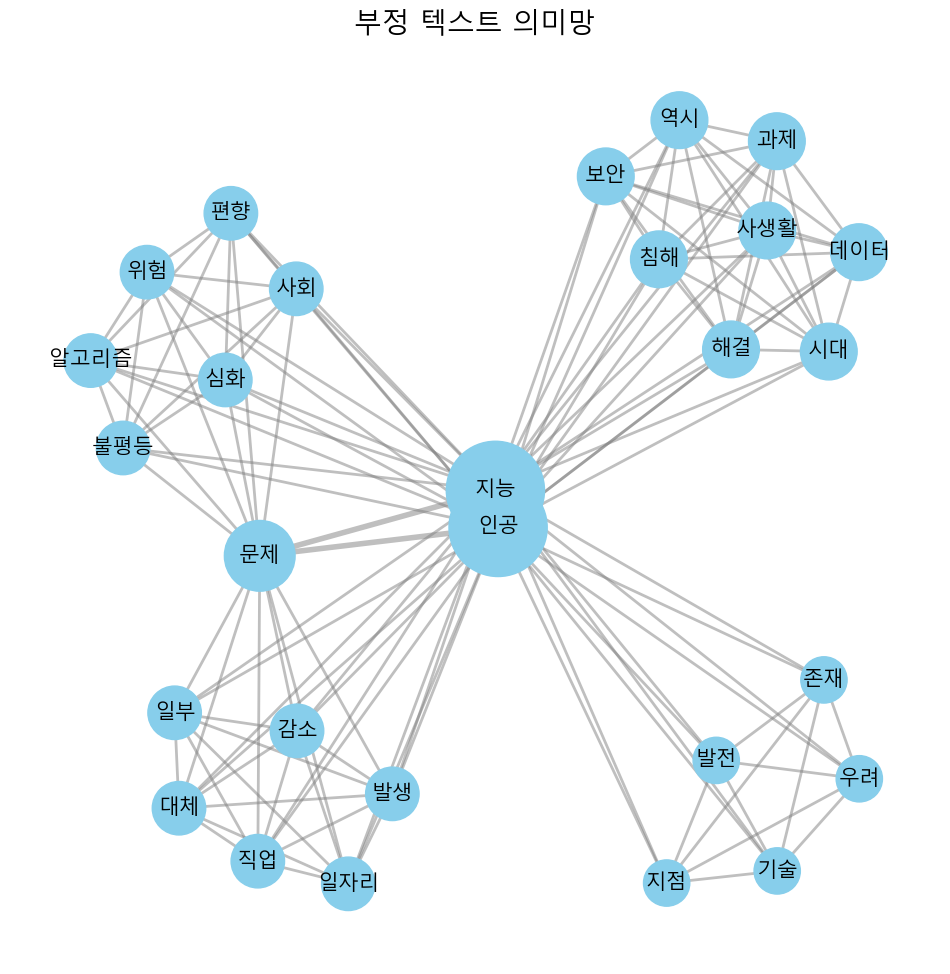

In [30]:
# 텍스트 1: 인공지능의 긍정적 측면
text_positive = """
인공지능 기술은 우리 사회에 많은 긍정적 변화를 가져오고 있습니다.
의료 분야에서는 인공지능이 질병을 조기에 진단하고, 개인 맞춤형 치료법을 개발합니다.
또한 인공지능은 반복적인 업무를 자동화하여 인간의 생산성을 크게 향상시킵니다.
교육 분야에서도 학생 개개인에게 맞춘 학습 콘텐츠를 제공하는 등 혁신을 이끌고 있습니다.
"""

# 텍스트 2: 인공지능의 우려되는 측면
text_negative = """
인공지능 기술 발전에는 우려되는 지점도 분명히 존재합니다.
일부 직업은 인공지능으로 대체되어 일자리 감소 문제가 발생할 수 있습니다.
또한 인공지능 알고리즘의 편향성 문제는 사회적 불평등을 심화시킬 위험이 있습니다.
데이터 보안과 사생활 침해 역시 인공지능 시대에 해결해야 할 중요한 과제입니다.
"""

okt = Okt()
kkma = Kkma()
my_font = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=my_font).get_name()
plt.rc("font", family=font_name)

def draw_semantic_network(text, title):
    nouns = okt.nouns(text)
    nouns = [i for i in nouns if len(i) >= 2]

    sentences_nouns = [] 
    for sentence in kkma.sentences(text):
        A = [j for j in okt.nouns(sentence) if len(j) >= 2]
        sentences_nouns.append(A)

    word_pairs = []
    for tokens in sentences_nouns:
        for pair in combinations(tokens, 2):
            word_pairs.append(tuple(sorted(pair)))

    word_pairs_count = Counter(word_pairs)
    G = nx.Graph()

    for pair, freq in word_pairs_count.items():
        if freq >= 1:
            G.add_edge(pair[0], pair[1], weight=freq)

    centrality = nx.degree_centrality(G)
    node_size = [v * 5000 for v in centrality.values()]
    edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="skyblue")
    nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=15)
    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()
    
    return G, centrality

G_pos, centrality_pos = draw_semantic_network(text_positive, "긍적 텍스트 의미망")
G_neg, centrality_neg = draw_semantic_network(text_negative, "부정 텍스트 의미망")

10번 - 설명.   

1. 긍정 텍스트 의미망 (G_pos)
- 중심 단어 예상: 인공지능, 기술, 의료, 학습, 개인, 혁신, 자동화

- 주요 연결: 인공지능 ↔ 기술, 인공지능 ↔ 의료/교육 ↔ 개인, 콘텐츠

→ 인공지능이 사회 전반에 긍정적인 혁신을 촉진하는 기술로 묘사됨   
   
2. 부정 텍스트 의미망 (G_neg)
- 중심 단어 예상: 인공지능, 문제, 일자리, 우려, 알고리즘, 보안

- 주요 연결: 인공지능 ↔ 우려/문제/편향성/침해

→ 인공지능이 초래할 수 있는 위험과 사회적 부작용에 대한 비판적 관점